# EXPERIMENT 06: USE_CASE_GENERATOR AGENT

### **Objective:** Implement an intelligent agent that generates actionable use cases by interacting with the Research Agent using a swarm-based architecture.

# **Agent Purpose**

The Use Case Generator Agent is responsible for:

1. Transforming research insights from the Research Agent into specific, actionable use cases

2. Contextualizing outputs based on business strategy (growth, profitability, innovation)

3. Interfacing with other agents (e.g., Business Analyst, Market Validator in future iterations)

> **Swarm Architecture Communication Protocol**



 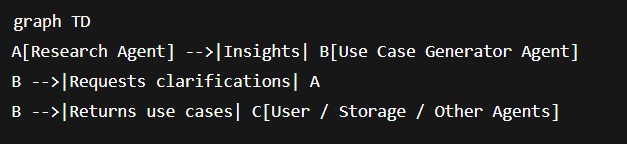

# SET-UP

In [ ]:
pip install haystack-ai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.7 MB/s eta 0:00:00


# CODING

In [ ]:
from haystack import component
from haystack.components.generators import OpenAIGenerator
from haystack.components.embedders import SentenceTransformersTextEmbedder
from typing import Dict

@component
class LLMUseCaseGeneratorComponent:
    def __init__(self, llm: OpenAIGenerator):
        self.llm = llm

    def run(self, research_output: Dict[str, str]) -> Dict[str, str]:

        input_context = "\n".join([f"{k}:\n{v}" for k, v in research_output.items()])


        prompt = f"""
You are a business strategist AI. Based on the company analysis below, generate a personalized, strategic plan for growth, profitability, and innovation.

Company Analysis:
{input_context}

Your output must include:
1. Five new markets this business could realistically enter with reasoning and stats of growth trajectory.
2. 10-15 implementable Profitability/investment/marketing strategies with figures and estimates leveraging current market trends, future tech tailored to its current cost/revenue structure.
3. Emerging technologies the business should explore based on their current stack.
4. A quarterly roadmap with specific initiatives- detailed breakdown.
5. Project the potential revenue growth percentage over the next 12 months with the adoption of these strategies and technology.
6. Provide risks, KPIs to monitor, and strategic rationale.

The tone should be suitable for a strategic boardroom review—impact-driven, data-informed, and forward-looking. Respond in a structured markup format.
"""

        response = self.llm.run(prompt=prompt)
        return {"use_case_strategy": response["replies"][0]}


# RESULTS:

In [ ]:
from haystack import Pipeline
from haystack.components.generators import OpenAIGenerator
from haystack.utils.auth import Secret
import os

llm_generator = OpenAIGenerator(
    api_key=Secret.from_env_var("OPENAI_API_KEY"),
    model="gpt-3.5-turbo",
     generation_kwargs={
        "temperature": 0.5,
        "max_tokens": 2000
    }
)
# Step 2: Create our use case generator component
usecase_gen_component = LLMUseCaseGeneratorComponent(llm=llm_generator)

# Step 3: Create the Haystack pipeline
pipeline = Pipeline()
pipeline.add_component("usecase_generator", usecase_gen_component)

# Step 4: Run it with research_agent output
research_agent_output = {
    "Business Strategy": (
        "Quick Commerce Model: Zepto delivers groceries and essentials within 10 minutes, differentiating it from traditional e-commerce. "
        "Dark Stores: They operate a network of dark stores (micro-fulfillment centers) in densely populated areas, optimized for speed. "
        "These are not open to the public and stock commonly ordered items. "
        "Hyperlocal Delivery: They use a hyperlocal delivery model, with an algorithm-based system for route planning and efficient delivery personnel utilization. "
        "App-Based Ordering: A user-friendly app allows quick browsing, ordering, and real-time tracking."
    ),
    "Technical Strategy": (
        "AI and Machine Learning: Used for optimizing inventory, supply chains, and demand prediction within dark stores. "
        "Data Analytics: Employed for efficient route planning, determining dark store locations, and understanding consumer behavior. "
        "App Technology: A user-friendly app for easy ordering, product browsing, and real-time order tracking."
    ),
    "Marketing Strategy": (
        "10-Minute Delivery Emphasis: Zepto’s marketing focuses on speed and convenience. "
        "Digital Marketing: Zepto uses social media, influencer marketing, and digital channels. "
        "Meme Marketing: Zepto leverages social media trends for engagement. "
        "Referral Programs: These incentivize both new and existing users. "
        "Partnerships: Collaboration with influencers. "
        "Advertising: Emphasis on the 10-minute delivery feature."
    ),
    "Projects and Recent Releases": (
        "Zepto Cafe is expanding its food and beverage offerings."
    ),
    "Contribution to Growth": (
        "Speed: The 10-minute delivery promise has attracted customers and set them apart from competitors. "
        "Technology: AI and data analytics have improved operational efficiency. "
        "Customer Experience: The app's ease of use and real-time tracking enhance customer satisfaction."
    ),
    "Innovative Approaches": (
        "Speed and Convenience: The core of Zepto’s value proposition. "
        "Dark Store Model: Enables fast order fulfillment. "
        "Technology Integration: Optimizes various aspects of the business."
    ),
    "Challenges": (
        "High Competition: The quick-commerce market has fierce competition. "
        "Logistics Costs: Maintaining delivery personnel and dark store operations. "
        "Customer Retention: Retaining customers in a competitive market. "
        "Regulatory Scrutiny: The quick-commerce industry is under scrutiny regarding delivery personnel."
    )
}


results = pipeline.run(data={"usecase_generator": {"research_output": research_agent_output}})
print(results["usecase_generator"]["use_case_strategy"])


# Strategic Plan for Growth, Profitability, and Innovation

## 1. New Market Expansion

### Markets:
1. **United Kingdom**
   - **Reasoning:** The UK has a growing quick-commerce market with a tech-savvy population and high demand for convenience.
   - **Growth Trajectory:** The UK quick-commerce market is projected to grow at a CAGR of 15% over the next five years.

2. **Germany**
   - **Reasoning:** Germany has a strong e-commerce market and a high population density, making it ideal for quick-commerce expansion.
   - **Growth Trajectory:** The German quick-commerce market is expected to grow by 20% in the next year.

3. **Japan**
   - **Reasoning:** Japan has a culture of convenience and technology adoption, making it a promising market for Zepto's quick-commerce model.
   - **Growth Trajectory:** The Japanese quick-commerce market is forecasted to grow by 25% in the next two years.

4. **Australia**
   - **Reasoning:** Australia has a tech-savvy population and a growing demand for 

# DELIVERABLES:

1. New Markets Identified (Automated by Agent)

2. Use Cases Generated by Agent

3. Profitability, Investment & Marketing Strategies

4. Emerging Technologies to Explore

5. Quarterly Roadmap

6. Projected Revenue Growth (12-Month Outlook)

7. Risks, KPIs & Strategic Rationale